In [85]:
'''
Predicting customer loan default based on 11 features of the Customer.
'''

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sb

df = pd.read_csv("C:/Users/user1/Desktop/Workshop/Assignments/week 3/train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [86]:
df.shape

(614, 13)

In [87]:
# 1. Checking Distributions
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [89]:
# 2. Missing Value Treatment

df.isna().sum() #get missing values by columns

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [90]:
df.count() # number of non-missing values

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [91]:
len(df) - df.isna().sum() # same as count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [92]:
#get distribution of columns with missing values
# Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History
print( df['Gender'].describe() )
print( df['Married'].describe() )
print( df['Dependents'].describe() )
print( df['Self_Employed'].describe() )
print( df['LoanAmount'].describe() )
print( df['Loan_Amount_Term'].describe() )
print( df['Credit_History'].describe() )

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object
count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object
count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object
count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object
count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64
count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64
count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64


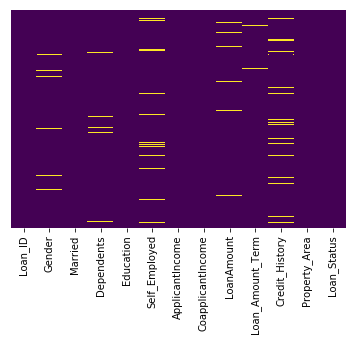

In [93]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [94]:
#Replace missing values with median or mode
df['LoanAmount'].fillna(128, inplace = True) 
df['Loan_Amount_Term'].fillna(360, inplace = True) 
df['Credit_History'].fillna(1, inplace = True)
df['Gender'].fillna('Male', inplace = True)
df['Dependents'].fillna('0', inplace = True)
df['Self_Employed'].fillna('No', inplace = True)
df['Married'].fillna('Yes', inplace = True)

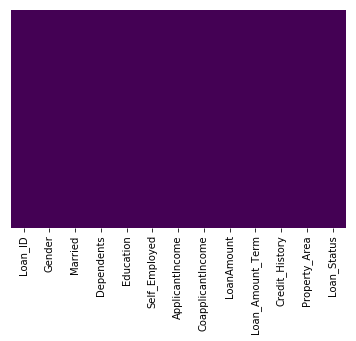

In [95]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') # missing values imputed

In [96]:
# 3. Default value treatment

# No default values as seen from Distributions

In [97]:
# 4. Outlier Treatment 
#Capping at P99 and Flooring at P01

for col in df._get_numeric_data():  # choose numeric columns
    percentiles = df[col].quantile([0.01,0.99]).values
    df[col][df[col] <= percentiles[0]] = percentiles[0]
    df[col][df[col] >= percentiles[1]] = percentiles[1]

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [98]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5214.577964,1483.654967,144.787687,342.762215,0.855049
std,4528.770082,1831.226927,78.513474,62.856673,0.352339
min,1025.000000,0.000000,30.650000,84.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,32540.410000,8895.890000,495.870000,480.000000,1.000000


Y    422
N    192
Name: Loan_Status, dtype: int64


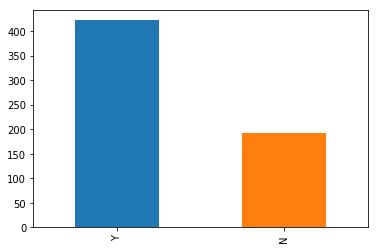

In [99]:
# Checking distribution of target variable

loan_status_count = df['Loan_Status'].value_counts()
print(loan_status_count)
loan_status_count.plot.bar()

In [100]:
# 5. Feature Engineering

#Convert Target to binary

df['Loan_Status2'] = df['Loan_Status'].map( {'Y':1 , 'N':0} )
df['Loan_Status2'].head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status2, dtype: int64

In [101]:
total_goods_bads_df = df.groupby( 'Loan_Status' ).count()
total_goods_bads_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status2
Loan_Status,,,,,,,,,,,,,
N,192,192,192,192,192,192,192,192,192,192,192,192,192
Y,422,422,422,422,422,422,422,422,422,422,422,422,422


In [102]:
#Calculating  Weight of Evidence and Information value for Property_Area

print (df[ ['Property_Area','Loan_Status2'] ][ ( df['Property_Area']=='Rural') & (df['Loan_Status2']==1) ].count())
print (df[ ['Property_Area','Loan_Status2'] ][ ( df['Property_Area']=='Rural') & (df['Loan_Status2']==0) ].count())
print (df[ ['Property_Area','Loan_Status2'] ][ ( df['Property_Area']=='Semiurban') & (df['Loan_Status2']==1) ].count())
print (df[ ['Property_Area','Loan_Status2'] ][ ( df['Property_Area']=='Semiurban') & (df['Loan_Status2']==0) ].count())
print (df[ ['Property_Area','Loan_Status2'] ][ ( df['Property_Area']=='Urban') & (df['Loan_Status2']==1) ].count())
print (df[ ['Property_Area','Loan_Status2'] ][ ( df['Property_Area']=='Urban') & (df['Loan_Status2']==0) ].count())

Property_Area    110
Loan_Status2     110
dtype: int64
Property_Area    69
Loan_Status2     69
dtype: int64
Property_Area    179
Loan_Status2     179
dtype: int64
Property_Area    54
Loan_Status2     54
dtype: int64
Property_Area    133
Loan_Status2     133
dtype: int64
Property_Area    69
Loan_Status2     69
dtype: int64


In [103]:
data = [['Rural', 110, 69], ['Semi-Urban', 179, 54], ['Urban', 133, 69]] 

df_Property_Area = pd.DataFrame(data, columns= ['Category','Goods','Bads'])

df_Property_Area['Percent_Good'] = 'NA'  # add new column
df_Property_Area['Percent_Bad'] = 'NA'
df_Property_Area['WOE'] = 'NA'
df_Property_Area['IV'] = 'NA'

df_Property_Area['Percent_Good'][0] = df_Property_Area['Goods'][0] / total_goods_bads_df['Loan_Status2'][1]
df_Property_Area['Percent_Good'][1] = df_Property_Area['Goods'][1] / total_goods_bads_df['Loan_Status2'][1]
df_Property_Area['Percent_Good'][2] = df_Property_Area['Goods'][2] / total_goods_bads_df['Loan_Status2'][1]

df_Property_Area['Percent_Bad'][0] = df_Property_Area['Bads'][0] / total_goods_bads_df['Loan_Status2'][0]
df_Property_Area['Percent_Bad'][1] = df_Property_Area['Bads'][1] / total_goods_bads_df['Loan_Status2'][0]
df_Property_Area['Percent_Bad'][2] = df_Property_Area['Bads'][2] / total_goods_bads_df['Loan_Status2'][0]


df_Property_Area['WOE'][0] = np.log( df_Property_Area['Percent_Good'][0] / df_Property_Area['Percent_Bad'][0] )
df_Property_Area['WOE'][1] = np.log( df_Property_Area['Percent_Good'][1] / df_Property_Area['Percent_Bad'][1] )
df_Property_Area['WOE'][2] = np.log( df_Property_Area['Percent_Good'][2] / df_Property_Area['Percent_Bad'][2] )

df_Property_Area['IV'][0] = ( df_Property_Area['Percent_Good'][0] - df_Property_Area['Percent_Bad'][0] ) * df_Property_Area['WOE'][0]
df_Property_Area['IV'][1] = ( df_Property_Area['Percent_Good'][1] - df_Property_Area['Percent_Bad'][1] ) * df_Property_Area['WOE'][1]
df_Property_Area['IV'][2] = ( df_Property_Area['Percent_Good'][2] - df_Property_Area['Percent_Bad'][2] ) * df_Property_Area['WOE'][2]

In [104]:
df_Property_Area

,Category,Goods,Bads,Percent_Good,Percent_Bad,WOE,IV
0,Rural,110,69,0.260664,0.359375,-0.321136,0.0316998
1,Semi-Urban,179,54,0.424171,0.28125,0.410892,0.0587249
2,Urban,133,69,0.315166,0.359375,-0.131267,0.00580321


In [105]:
#Calculating  Weight of Evidence and Information value for Gender

print (df[ ['Gender','Loan_Status2'] ][ ( df['Gender']=='Male') & (df['Loan_Status2']==1) ].count())
print (df[ ['Gender','Loan_Status2'] ][ ( df['Gender']=='Male') & (df['Loan_Status2']==0) ].count())
print (df[ ['Gender','Loan_Status2'] ][ ( df['Gender']=='Female') & (df['Loan_Status2']==1) ].count())
print (df[ ['Gender','Loan_Status2'] ][ ( df['Gender']=='Female') & (df['Loan_Status2']==0) ].count())

Gender          347
Loan_Status2    347
dtype: int64
Gender          155
Loan_Status2    155
dtype: int64
Gender          75
Loan_Status2    75
dtype: int64
Gender          37
Loan_Status2    37
dtype: int64


In [106]:
data = [['Male', 347, 155], ['Female', 75, 37]] 

df_Gender = pd.DataFrame(data, columns= ['Category','Goods','Bads'])

df_Gender['Percent_Good'] = 'NA'  # add new column
df_Gender['Percent_Bad'] = 'NA'
df_Gender['WOE'] = 'NA'
df_Gender['IV'] = 'NA'

df_Gender['Percent_Good'][0] = df_Gender['Goods'][0] / total_goods_bads_df['Loan_Status2'][1]
df_Gender['Percent_Good'][1] = df_Gender['Goods'][1] / total_goods_bads_df['Loan_Status2'][1]

df_Gender['Percent_Bad'][0] = df_Gender['Bads'][0] / total_goods_bads_df['Loan_Status2'][0]
df_Gender['Percent_Bad'][1] = df_Gender['Bads'][1] / total_goods_bads_df['Loan_Status2'][0]


df_Gender['WOE'][0] = np.log( df_Gender['Percent_Good'][0] / df_Gender['Percent_Bad'][0] )
df_Gender['WOE'][1] = np.log( df_Gender['Percent_Good'][1] / df_Gender['Percent_Bad'][1] )

df_Gender['IV'][0] = ( df_Gender['Percent_Good'][0] - df_Gender['Percent_Bad'][0] ) * df_Gender['WOE'][0]
df_Gender['IV'][1] = ( df_Gender['Percent_Good'][1] - df_Gender['Percent_Bad'][1] ) * df_Gender['WOE'][1]

df_Gender

,Category,Goods,Bads,Percent_Good,Percent_Bad,WOE,IV
0,Male,347,155,0.822275,0.807292,0.0183897,0.000275537
1,Female,75,37,0.177725,0.192708,-0.0809397,0.00121274


In [107]:
#Calculating  Weight of Evidence and Information value for Married

print (df[ ['Married','Loan_Status2'] ][ ( df['Married']=='Yes') & (df['Loan_Status2']==1) ].count())
print (df[ ['Married','Loan_Status2'] ][ ( df['Married']=='Yes') & (df['Loan_Status2']==0) ].count())
print (df[ ['Married','Loan_Status2'] ][ ( df['Married']=='No') & (df['Loan_Status2']==1) ].count())
print (df[ ['Married','Loan_Status2'] ][ ( df['Married']=='No') & (df['Loan_Status2']==0) ].count())

Married         288
Loan_Status2    288
dtype: int64
Married         113
Loan_Status2    113
dtype: int64
Married         134
Loan_Status2    134
dtype: int64
Married         79
Loan_Status2    79
dtype: int64


In [108]:
data = [['Yes', 288, 113], ['No', 134, 79]] 

df_Married = pd.DataFrame(data, columns= ['Category','Goods','Bads'])

df_Married['Percent_Good'] = 'NA'  # add new column
df_Married['Percent_Bad'] = 'NA'
df_Married['WOE'] = 'NA'
df_Married['IV'] = 'NA'

df_Married['Percent_Good'][0] = df_Married['Goods'][0] / total_goods_bads_df['Loan_Status2'][1]
df_Married['Percent_Good'][1] = df_Married['Goods'][1] / total_goods_bads_df['Loan_Status2'][1]

df_Married['Percent_Bad'][0] = df_Married['Bads'][0] / total_goods_bads_df['Loan_Status2'][0]
df_Married['Percent_Bad'][1] = df_Married['Bads'][1] / total_goods_bads_df['Loan_Status2'][0]


df_Married['WOE'][0] = np.log( df_Married['Percent_Good'][0] / df_Married['Percent_Bad'][0] )
df_Married['WOE'][1] = np.log( df_Married['Percent_Good'][1] / df_Married['Percent_Bad'][1] )

df_Married['IV'][0] = ( df_Married['Percent_Good'][0] - df_Married['Percent_Bad'][0] ) * df_Married['WOE'][0]
df_Married['IV'][1] = ( df_Married['Percent_Good'][1] - df_Married['Percent_Bad'][1] ) * df_Married['WOE'][1]

df_Married

,Category,Goods,Bads,Percent_Good,Percent_Bad,WOE,IV
0,Yes,288,113,0.682464,0.588542,0.148063,0.0139065
1,No,134,79,0.317536,0.411458,-0.259118,0.0243371


In [109]:
#Calculating  Weight of Evidence and Information value for Education

print (df[ ['Education','Loan_Status2'] ][ ( df['Education']=='Graduate') & (df['Loan_Status2']==1) ].count())
print (df[ ['Education','Loan_Status2'] ][ ( df['Education']=='Graduate') & (df['Loan_Status2']==0) ].count())
print (df[ ['Education','Loan_Status2'] ][ ( df['Education']=='Not Graduate') & (df['Loan_Status2']==1) ].count())
print (df[ ['Education','Loan_Status2'] ][ ( df['Education']=='Not Graduate') & (df['Loan_Status2']==0) ].count())

Education       340
Loan_Status2    340
dtype: int64
Education       140
Loan_Status2    140
dtype: int64
Education       82
Loan_Status2    82
dtype: int64
Education       52
Loan_Status2    52
dtype: int64


In [110]:
data = [['Graduate', 340, 140], ['Not Graduate', 82, 52]] 

df_Education = pd.DataFrame(data, columns= ['Category','Goods','Bads'])

df_Education['Percent_Good'] = 'NA'  # add new column
df_Education['Percent_Bad'] = 'NA'
df_Education['WOE'] = 'NA'
df_Education['IV'] = 'NA'

df_Education['Percent_Good'][0] = df_Education['Goods'][0] / total_goods_bads_df['Loan_Status2'][1]
df_Education['Percent_Good'][1] = df_Education['Goods'][1] / total_goods_bads_df['Loan_Status2'][1]

df_Education['Percent_Bad'][0] = df_Education['Bads'][0] / total_goods_bads_df['Loan_Status2'][0]
df_Education['Percent_Bad'][1] = df_Education['Bads'][1] / total_goods_bads_df['Loan_Status2'][0]


df_Education['WOE'][0] = np.log( df_Education['Percent_Good'][0] / df_Education['Percent_Bad'][0] )
df_Education['WOE'][1] = np.log( df_Education['Percent_Good'][1] / df_Education['Percent_Bad'][1] )

df_Education['IV'][0] = ( df_Education['Percent_Good'][0] - df_Education['Percent_Bad'][0] ) * df_Education['WOE'][0]
df_Education['IV'][1] = ( df_Education['Percent_Good'][1] - df_Education['Percent_Bad'][1] ) * df_Education['WOE'][1]

df_Education

,Category,Goods,Bads,Percent_Good,Percent_Bad,WOE,IV
0,Graduate,340,140,0.805687,0.729167,0.0997933,0.00763623
1,Not Graduate,82,52,0.194313,0.270833,-0.332034,0.0254075


In [111]:
#Calculating  Weight of Evidence and Information value for Self_Employed

print (df[ ['Self_Employed','Loan_Status2'] ][ ( df['Self_Employed']=='Yes') & (df['Loan_Status2']==1) ].count())
print (df[ ['Self_Employed','Loan_Status2'] ][ ( df['Self_Employed']=='Yes') & (df['Loan_Status2']==0) ].count())
print (df[ ['Self_Employed','Loan_Status2'] ][ ( df['Self_Employed']=='No') & (df['Loan_Status2']==1) ].count())
print (df[ ['Self_Employed','Loan_Status2'] ][ ( df['Self_Employed']=='No') & (df['Loan_Status2']==0) ].count())

Self_Employed    56
Loan_Status2     56
dtype: int64
Self_Employed    26
Loan_Status2     26
dtype: int64
Self_Employed    366
Loan_Status2     366
dtype: int64
Self_Employed    166
Loan_Status2     166
dtype: int64


In [112]:
data = [['Yes', 56, 26], ['No', 366, 166]] 

df_Self_Employed = pd.DataFrame(data, columns= ['Category','Goods','Bads'])

df_Self_Employed['Percent_Good'] = 'NA'  # add new column
df_Self_Employed['Percent_Bad'] = 'NA'
df_Self_Employed['WOE'] = 'NA'
df_Self_Employed['IV'] = 'NA'

df_Self_Employed['Percent_Good'][0] = df_Self_Employed['Goods'][0] / total_goods_bads_df['Loan_Status2'][1]
df_Self_Employed['Percent_Good'][1] = df_Self_Employed['Goods'][1] / total_goods_bads_df['Loan_Status2'][1]

df_Self_Employed['Percent_Bad'][0] = df_Self_Employed['Bads'][0] / total_goods_bads_df['Loan_Status2'][0]
df_Self_Employed['Percent_Bad'][1] = df_Self_Employed['Bads'][1] / total_goods_bads_df['Loan_Status2'][0]


df_Self_Employed['WOE'][0] = np.log( df_Self_Employed['Percent_Good'][0] / df_Self_Employed['Percent_Bad'][0] )
df_Self_Employed['WOE'][1] = np.log( df_Self_Employed['Percent_Good'][1] / df_Self_Employed['Percent_Bad'][1] )

df_Self_Employed['IV'][0] = ( df_Self_Employed['Percent_Good'][0] - df_Self_Employed['Percent_Bad'][0] ) * df_Self_Employed['WOE'][0]
df_Self_Employed['IV'][1] = ( df_Self_Employed['Percent_Good'][1] - df_Self_Employed['Percent_Bad'][1] ) * df_Self_Employed['WOE'][1]

df_Self_Employed

,Category,Goods,Bads,Percent_Good,Percent_Bad,WOE,IV
0,Yes,56,26,0.132701,0.135417,-0.0202548,5.49967e-05
1,No,366,166,0.867299,0.864583,0.0031356,8.51393e-06


In [113]:
#Calculating  Weight of Evidence and Information value for Dependents

print (df[ ['Dependents','Loan_Status2'] ][ ( df['Dependents']=='0') & (df['Loan_Status2']==1) ].count())
print (df[ ['Dependents','Loan_Status2'] ][ ( df['Dependents']=='1') & (df['Loan_Status2']==1) ].count())
print (df[ ['Dependents','Loan_Status2'] ][ ( df['Dependents']=='2') & (df['Loan_Status2']==1) ].count())
print (df[ ['Dependents','Loan_Status2'] ][ ( df['Dependents']=='3+') & (df['Loan_Status2']==1) ].count())
print (df[ ['Dependents','Loan_Status2'] ][ ( df['Dependents']=='0') & (df['Loan_Status2']==0) ].count())
print (df[ ['Dependents','Loan_Status2'] ][ ( df['Dependents']=='1') & (df['Loan_Status2']==0) ].count())
print (df[ ['Dependents','Loan_Status2'] ][ ( df['Dependents']=='2') & (df['Loan_Status2']==0) ].count())
print (df[ ['Dependents','Loan_Status2'] ][ ( df['Dependents']=='3+') & (df['Loan_Status2']==0) ].count())

Dependents      247
Loan_Status2    247
dtype: int64
Dependents      66
Loan_Status2    66
dtype: int64
Dependents      76
Loan_Status2    76
dtype: int64
Dependents      33
Loan_Status2    33
dtype: int64
Dependents      113
Loan_Status2    113
dtype: int64
Dependents      36
Loan_Status2    36
dtype: int64
Dependents      25
Loan_Status2    25
dtype: int64
Dependents      18
Loan_Status2    18
dtype: int64


In [114]:
data = [['0', 247, 113], ['1', 66, 36], ['2', 76, 25], ['3+', 33, 18]] 

df_Dependents = pd.DataFrame(data, columns= ['Category','Goods','Bads'])

df_Dependents['Percent_Good'] = 'NA'  # add new column
df_Dependents['Percent_Bad'] = 'NA'
df_Dependents['WOE'] = 'NA'
df_Dependents['IV'] = 'NA'

df_Dependents['Percent_Good'][0] = df_Dependents['Goods'][0] / total_goods_bads_df['Loan_Status2'][1]
df_Dependents['Percent_Good'][1] = df_Dependents['Goods'][1] / total_goods_bads_df['Loan_Status2'][1]
df_Dependents['Percent_Good'][2] = df_Dependents['Goods'][2] / total_goods_bads_df['Loan_Status2'][1]
df_Dependents['Percent_Good'][3] = df_Dependents['Goods'][3] / total_goods_bads_df['Loan_Status2'][1]

df_Dependents['Percent_Bad'][0] = df_Dependents['Bads'][0] / total_goods_bads_df['Loan_Status2'][0]
df_Dependents['Percent_Bad'][1] = df_Dependents['Bads'][1] / total_goods_bads_df['Loan_Status2'][0]
df_Dependents['Percent_Bad'][2] = df_Dependents['Bads'][2] / total_goods_bads_df['Loan_Status2'][0]
df_Dependents['Percent_Bad'][3] = df_Dependents['Bads'][3] / total_goods_bads_df['Loan_Status2'][0]


df_Dependents['WOE'][0] = np.log( df_Dependents['Percent_Good'][0] / df_Dependents['Percent_Bad'][0] )
df_Dependents['WOE'][1] = np.log( df_Dependents['Percent_Good'][1] / df_Dependents['Percent_Bad'][1] )
df_Dependents['WOE'][2] = np.log( df_Dependents['Percent_Good'][2] / df_Dependents['Percent_Bad'][2] )
df_Dependents['WOE'][3] = np.log( df_Dependents['Percent_Good'][3] / df_Dependents['Percent_Bad'][3] )

df_Dependents['IV'][0] = ( df_Dependents['Percent_Good'][0] - df_Dependents['Percent_Bad'][0] ) * df_Dependents['WOE'][0]
df_Dependents['IV'][1] = ( df_Dependents['Percent_Good'][1] - df_Dependents['Percent_Bad'][1] ) * df_Dependents['WOE'][1]
df_Dependents['IV'][2] = ( df_Dependents['Percent_Good'][2] - df_Dependents['Percent_Bad'][2] ) * df_Dependents['WOE'][2]
df_Dependents['IV'][3] = ( df_Dependents['Percent_Good'][3] - df_Dependents['Percent_Bad'][3] ) * df_Dependents['WOE'][3]

df_Dependents

,Category,Goods,Bads,Percent_Good,Percent_Bad,WOE,IV
0,0,247,113,0.585308,0.588542,-0.00550942,1.78153e-05
1,1,66,36,0.156398,0.1875,-0.181374,0.00564108
2,2,76,25,0.180095,0.130208,0.324348,0.0161806
3,3+,33,18,0.0781991,0.09375,-0.181374,0.00282054


In [115]:
# Replacing categorical values with corresponding WOE

df['Gender'] = df['Gender'].map( {'Male':0.01838972 , 'Female':-0.08093974} )
df['Married'] = df['Married'].map( {'Yes':0.1480627 , 'No':-0.2591180} )
df['Dependents'] = df['Dependents'].map( {'0':-0.005509424 , '1':-0.181374138 , '2':0.324347573 , '3+':-0.181374138} )
df['Education'] = df['Education'].map( {'Graduate':0.09979325 , 'Not Graduate':-0.33203441} )
df['Self_Employed'] = df['Self_Employed'].map( {'Yes':-0.020254789 , 'No':0.003135603} )
df['Property_Area'] = df['Property_Area'].map( {'Rural':-0.3211361 , 'Semiurban':0.4108918 , 'Urban':-0.1312673} )
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status2
0,LP001002,0.01839,-0.259118,-0.005509,0.099793,0.003136,5849.0,0.0,128.0,360.0,1.0,-0.131267,Y,1
1,LP001003,0.01839,0.148063,-0.181374,0.099793,0.003136,4583.0,1508.0,128.0,360.0,1.0,-0.321136,N,0
2,LP001005,0.01839,0.148063,-0.005509,0.099793,-0.020255,3000.0,0.0,66.0,360.0,1.0,-0.131267,Y,1
3,LP001006,0.01839,0.148063,-0.005509,-0.332034,0.003136,2583.0,2358.0,120.0,360.0,1.0,-0.131267,Y,1
4,LP001008,0.01839,-0.259118,-0.005509,0.099793,0.003136,6000.0,0.0,141.0,360.0,1.0,-0.131267,Y,1


In [116]:
# 6. Variable reduction

df.drop('Loan_ID',axis=1,inplace=True) 
df.drop('Loan_Status',axis=1,inplace=True) 
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status2
0,0.01839,-0.259118,-0.005509,0.099793,0.003136,5849.0,0.0,128.0,360.0,1.0,-0.131267,1
1,0.01839,0.148063,-0.181374,0.099793,0.003136,4583.0,1508.0,128.0,360.0,1.0,-0.321136,0
2,0.01839,0.148063,-0.005509,0.099793,-0.020255,3000.0,0.0,66.0,360.0,1.0,-0.131267,1
3,0.01839,0.148063,-0.005509,-0.332034,0.003136,2583.0,2358.0,120.0,360.0,1.0,-0.131267,1
4,0.01839,-0.259118,-0.005509,0.099793,0.003136,6000.0,0.0,141.0,360.0,1.0,-0.131267,1


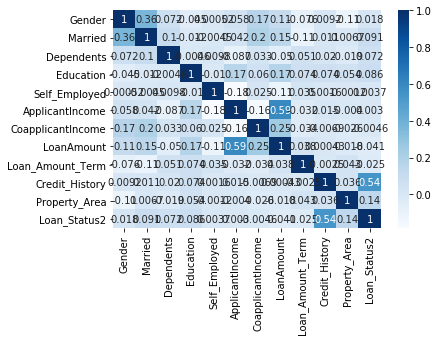

In [117]:
# Checking Correlation 

sb.heatmap(df.corr(), annot=True, cmap="Blues")

In [118]:
# 7. Train-Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Loan_Status2',axis=1), 
                                                    df['Loan_Status2'], test_size=0.30, 
                                                    random_state=100)

In [119]:
# 8. Reducing Multicollinearity


# For each X, calculate VIF and save in dataframe
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = X_train.columns
vif["VIF value"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.sort_values('VIF value', ascending=False)


,features,VIF value
8,Loan_Amount_Term,8.876492
7,LoanAmount,7.994015
9,Credit_History,5.960261
5,ApplicantIncome,4.045061
6,CoapplicantIncome,2.112567
1,Married,1.252307
0,Gender,1.218000
4,Self_Employed,1.041348
10,Property_Area,1.041262
2,Dependents,1.041135


In [120]:
# drop variables with too high VIFs(>7)

X_train.drop('Loan_Amount_Term', axis=1, inplace=True)
X_train.drop('LoanAmount', axis=1, inplace=True)

X_test.drop('Loan_Amount_Term', axis=1, inplace=True)
X_test.drop('LoanAmount', axis=1, inplace=True)

In [121]:
# 9. Model Fitting

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

print("Classification Report:")
print(classification_report(y_test,predictions))

print("Accuracy=",accuracy_score(y_test, predictions))

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test,predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.40      0.55        63
           1       0.76      0.98      0.85       122

   micro avg       0.78      0.78      0.78       185
   macro avg       0.83      0.69      0.70       185
weighted avg       0.80      0.78      0.75       185

Accuracy= 0.7783783783783784

Confusion Matrix: 
[[ 25  38]
 [  3 119]]


In [122]:
# 10. Model Validation(10-fold cross validation)

from sklearn.linear_model import LogisticRegressionCV

logmodel = LogisticRegressionCV(cv=10, random_state=0)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

print("Classification Report:")
print(classification_report(y_test,predictions))

print("Accuracy=",accuracy_score(y_test, predictions))

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test,predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.40      0.55        63
           1       0.76      0.98      0.85       122

   micro avg       0.78      0.78      0.78       185
   macro avg       0.83      0.69      0.70       185
weighted avg       0.80      0.78      0.75       185

Accuracy= 0.7783783783783784

Confusion Matrix: 
[[ 25  38]
 [  3 119]]


In [123]:
# 11. Validating with AUC-ROC curve

from sklearn.metrics import roc_auc_score  

auc = roc_auc_score(y_test,predictions)  
print("AUC score: ",auc)  

AUC score:  0.6861176164454853


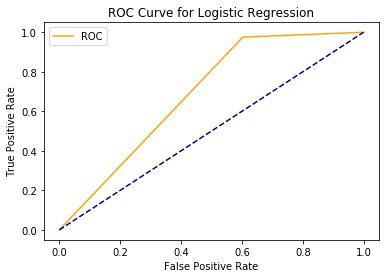

In [124]:
import matplotlib.pyplot as plt  
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Logistic Regression')
    plt.legend()
    plt.show()

fpr, tpr, thresholds = roc_curve(y_test,predictions)  
plot_roc_curve(fpr, tpr)  

In [125]:
# K-Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print("Classification Report:")
print(classification_report(y_test,predictions))

print("Accuracy=",accuracy_score(y_test, predictions))

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test,predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.25      0.31        63
           1       0.67      0.80      0.73       122

   micro avg       0.61      0.61      0.61       185
   macro avg       0.53      0.52      0.52       185
weighted avg       0.58      0.61      0.59       185

Accuracy= 0.6108108108108108

Confusion Matrix: 
[[16 47]
 [25 97]]


In [126]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=6, max_features=6)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

print("Classification Report:")
print(classification_report(y_test,predictions))

print("Accuracy=",accuracy_score(y_test, predictions))

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test,predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.44      0.59        63
           1       0.77      0.97      0.86       122

   micro avg       0.79      0.79      0.79       185
   macro avg       0.82      0.71      0.72       185
weighted avg       0.81      0.79      0.77       185

Accuracy= 0.7891891891891892

Confusion Matrix: 
[[ 28  35]
 [  4 118]]


In [127]:
# Validating with AUC-ROC curve 

auc = roc_auc_score(y_test,predictions)  
print("AUC score: ",auc) 

AUC score:  0.7058287795992714


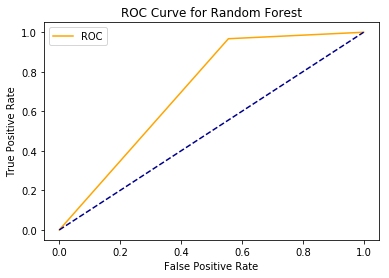

In [128]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Random Forest')
    plt.legend()
    plt.show()

fpr, tpr, thresholds = roc_curve(y_test,predictions)  
plot_roc_curve(fpr, tpr)  